# Julia prototype 

This notebook is used for analyzing the latency properties of the Julia prototype, whose code is stored in `<project root>/julia`.

## Running the experiment

For a more detailed explanation of how the latency experiment run on the different prototypes works, see the "Running the experiment" section in [05_results_python.ipynb](./05_results_python.ipynb). This notebook will just explain the commands necessary to run the latency procedure on the echo and LMS filters for the Julia prototype.

### Echo filter

The code for the Julia prototype is stored in `<project root>/julia/realtime.jl`. To run the latency procedure for the echo filter, you will need two separate terminal windows. First, use the following command to launch the processor in the first terminal:
```console
> julia julia/realtime.jl processor --host 127.0.0.1 --port 8889 --filter echo
```
Once the processor instance is running, use this command to start the probe in the second terminal (this will start the experiment):
```console
> julia julia/realtime.jl probe --host 127.0.0.1 --port 8889 --input data/processed/test_spks.h5 --output data/results/julia_echo.h5
```
This setup runs both the processor and probe instances on `localhost`, communicating through port 8889. To run them on different machines or a different port, just change these values.

### LMS filter

**NOTE: The LMS filter for the Julia prototype has NOT been implemented yet!**

To run the experiment for the LMS filter, use the same commands with the `--filter` option for the processor instance changed from `echo` to `lms`, and the output filename changed:

Terminal 1:
```console
> julia julia/realtime.jl processor --host 127.0.0.1 --port 8889 --filter lms
```
Terminal 2:
```console
> julia julia/realtime.jl probe --host 127.0.0.1 --port 8889 --input data/processed/test_spks.h5 --output data/results/julia_lms.h5
```

## Imports

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load filter outputs from file

In [2]:
ECHO_FPATH = '../data/results/julia_echo.h5'
#LMS_FPATH = '../data/results/julia_lms.h5'

with h5py.File(ECHO_FPATH, 'r') as f:
    fp_echo = f['filter_preds'][:]
    rt_echo = f['rt_times_us'][:]
    
#with h5py.File(LMS_FPATH, 'r') as f:
#    fp_lms = f['filter_preds'][:]
#    rt_lms = f['rt_times_us'][:]

## Latency distribution

### Summary statistics

In [3]:
print('Echo filter')
print(f'    min: {np.min(rt_echo):.2f} us')
print(f'    max: {np.max(rt_echo):.2f} us')
print(f'    mean: {np.mean(rt_echo):.2f} us')
print(f'    median: {np.median(rt_echo):.2f} us')

#print('')
#print('LMS filter')
#print(f'    min: {np.min(rt_lms):.2f} us')
#print(f'    max: {np.max(rt_lms):.2f} us')
#print(f'    mean: {np.mean(rt_lms):.2f} us')
#print(f'    median: {np.median(rt_lms):.2f} us')

Echo filter
    min: 97.05 us
    max: 169042.32 us
    mean: 146.93 us
    median: 109.75 us


### Full distribution

[Text(0.5, 0, 'latency (microseconds)')]

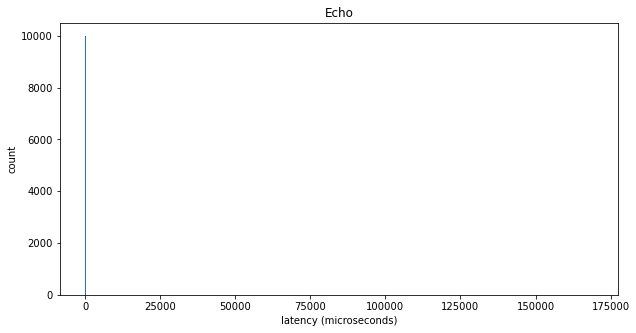

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title('Echo');
ax.hist(rt_echo, bins=500)
ax.set(ylabel='count')
ax.set(xlabel='latency (microseconds)')

#ax[1].set_title('LMS');
#ax[1].hist(rt_lms, bins=500);
#ax[1].set(xlabel='latency (microseconds)');

### Distribution with outliers removed

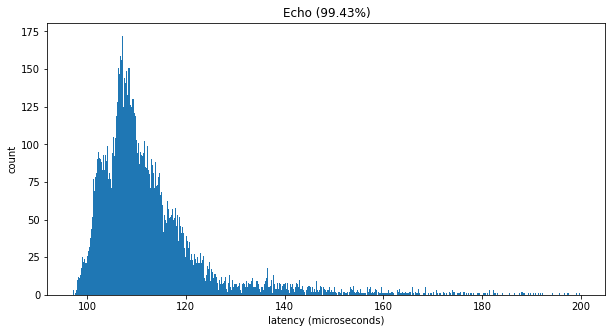

In [5]:
# Max values for histogram (all larger values will be excluded)
ECHO_MAX = 200
#LMS_MAX = 11000

# Latency values to plot
rt_echo_plt = rt_echo[rt_echo < ECHO_MAX]
#rt_lms_plt = rt_lms[rt_lms < LMS_MAX]

# Percentages of values included
pct_echo = rt_echo_plt.shape[0] / rt_echo.shape[0] * 100
#pct_lms = rt_lms_plt.shape[0] / rt_lms.shape[0] * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_title(f'Echo ({pct_echo:.2f}%)');
ax.hist(rt_echo[rt_echo < ECHO_MAX], bins=500)
ax.set(ylabel='count')
ax.set(xlabel='latency (microseconds)');

#ax[1].set_title(f'LMS ({pct_lms:.2f}%)');
#ax[1].hist(rt_lms[rt_lms < LMS_MAX], bins=500);
#ax[1].set(xlabel='latency (microseconds)');